In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Input
from keras import Sequential
from keras.losses import MeanSquaredError, BinaryCrossentropy
from keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

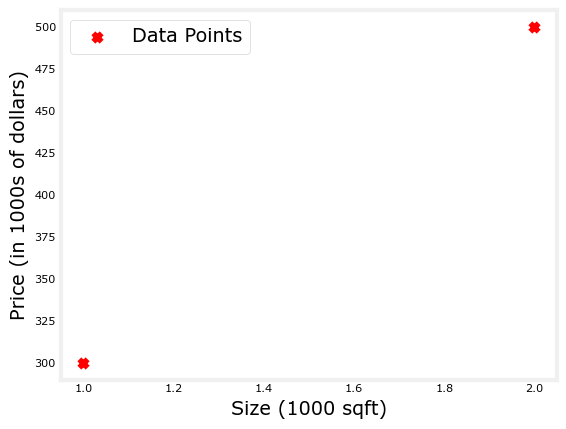

In [37]:

X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [38]:
X_train[0].reshape(1,1)

array([[1.]], dtype=float32)

In [39]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')
linear_layer.get_weights()

[]

In [40]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.67]], shape=(1, 1), dtype=float32)


In [41]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.67]], b=[0.]


In [42]:
linear_layer(X_train)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.67],
       [1.35]], dtype=float32)>

In [43]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [45]:
a1 = linear_layer(X_train[0].reshape(-1,1))
print(a1)
alin = np.dot(set_w, X_train[0]) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


In [25]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32)

In [26]:
X_train

array([0., 1., 2., 3., 4., 5.], dtype=float32)

In [27]:
X_train.reshape(-1, 1)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]], dtype=float32)

In [46]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [47]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

In [48]:
pos

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

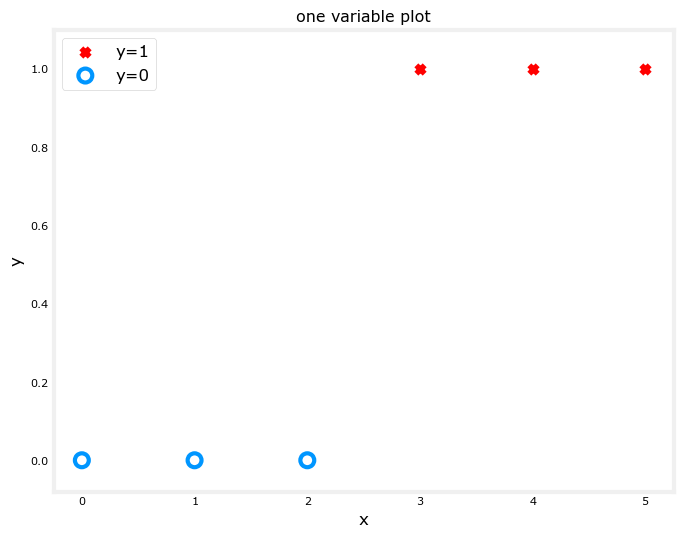

In [57]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(X_train[pos], Y_train[pos], marker='x', c='red', label='y=1')
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label='y=0', facecolors='none', edgecolors=dlc["dlblue"], lw=3)
ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()


In [60]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')

    ]
)

/Users/yutowilliam/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[1.38]] [0.]
(1, 1) (1,)


In [65]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [67]:
X_train

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]], dtype=float32)

In [74]:
X_train[0].shape

(1,)

In [75]:
a1 = model.predict(X_train[0].reshape(-1,1))
a1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.01]], dtype=float32)

In [69]:
a1 = model.predict(X_train)
a1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.01],
       [0.08],
       [0.38],
       [0.82],
       [0.97],
       [1.  ]], dtype=float32)